In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jessiececilya/ML-Data/main/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#drop unnecessary columns
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace = True)

In [ ]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
#Normalizing (recaling) data
for each in ["CreditScore", "Age","Tenure", "Balance", "EstimatedSalary"]:
    data[each] = (data[each] - np.min(data[each])) / (np.max(data[each])-np.min(data[each]))

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  float64 
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  float64 
 4   Tenure           10000 non-null  float64 
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(6), float64(5)
memory usage: 450.0 KB


In [ ]:
#Converting data type to categorical
for each in ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"]:
    data[each] = data[each].astype("category")

In [ ]:
data = pd.get_dummies(data, columns = ["Geography","Gender", "NumOfProducts"])

In [ ]:
#Multilayer neural network
X_train = data.drop(columns = ["Exited"], axis=1)
y_train = data["Exited"]

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train,
    test_size = 0.33,
    random_state = 42
)

print("Length of X_train: ",len(X_train))
print("Length of X_test: ",len(X_test))
print("Length of y_train: ",len(y_train))
print("Length of y_test: ",len(y_test))

Length of X_train:  6700
Length of X_test:  3300
Length of y_train:  6700
Length of y_test:  3300


In [ ]:
print(
    "Shape of X_train: ",np.shape(X_train),
    "\nShape of y_train: ",np.shape(y_train)
)

Shape of X_train:  (6700, 16) 
Shape of y_train:  (6700,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X_test.columns.values)

KerasClassifier

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential     # Neural network library
from keras.layers import Dense          # layer library

In [ ]:
#defining function to model 

def create_model():
    
    # create model
    model = Sequential()
    
    # adding input layer
    model.add(Dense(units = 12, kernel_initializer = "uniform", activation = "relu", input_dim = 16))
    
    # adding layer
    model.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
    
    # adding layer
    model.add(Dense(units = 4, kernel_initializer = "uniform", activation = "relu"))
        
    # adding output layer
    model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
    
    # compile model
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    
    return model   

In [ ]:
model1 = KerasClassifier(build_fn = create_model, epochs=15)

In [ ]:
#Fitting model
history1 = model1.fit(X_train,y_train)

Epoch 1/15
210/210 [==============================] - 1s 1ms/step - loss: 0.6495 - accuracy: 0.7809
Epoch 2/15
210/210 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.7970
Epoch 3/15
210/210 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.7897
Epoch 4/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.7882
Epoch 5/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.7895
Epoch 6/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8328
Epoch 7/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8471
Epoch 8/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8474
Epoch 9/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8536
Epoch 10/15
210/210 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8491

In [ ]:
#Model with decreased batch size
model2 = KerasClassifier(build_fn = create_model, epochs=15, batch_size = 10)
history2 = model2.fit(X_train, y_train)

Epoch 1/15
670/670 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7969
Epoch 2/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3969 - accuracy: 0.7843
Epoch 3/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 0.8317
Epoch 4/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3662 - accuracy: 0.8515
Epoch 5/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3800 - accuracy: 0.8453
Epoch 6/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3765 - accuracy: 0.8473
Epoch 7/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3447 - accuracy: 0.8636
Epoch 8/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8525
Epoch 9/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3727 - accuracy: 0.8497
Epoch 10/15
670/670 [==============================] - 1s 1ms/step - loss: 0.3532 - accuracy: 0.8579

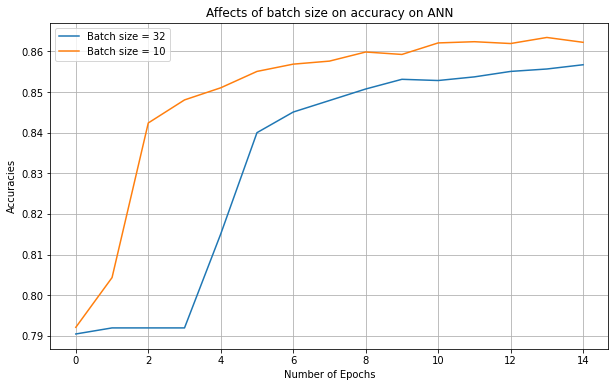

In [ ]:
plt.subplots(figsize = (10,6))
plt.plot(history1.history["accuracy"], label = "Batch size = 32")
plt.plot(history2.history["accuracy"], label = "Batch size = 10")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracies")
plt.title("Affects of batch size on accuracy on ANN")
plt.grid(axis = "both")

plt.legend()
plt.show()

In [ ]:
#evaluating model with cross_val_score and stratified fold
model = KerasClassifier(build_fn = create_model, epochs=15, batch_size = 10)
kfold = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 42)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold)

Epoch 1/15
626/626 [==============================] - 1s 1ms/step - loss: 0.5593 - accuracy: 0.7815
Epoch 2/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.7938
Epoch 3/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.8482
Epoch 4/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3718 - accuracy: 0.8516
Epoch 5/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8496
Epoch 6/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3560 - accuracy: 0.8597
Epoch 7/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3675 - accuracy: 0.8521
Epoch 8/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3552 - accuracy: 0.8629
Epoch 9/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3631 - accuracy: 0.8550
Epoch 10/15
626/626 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8475

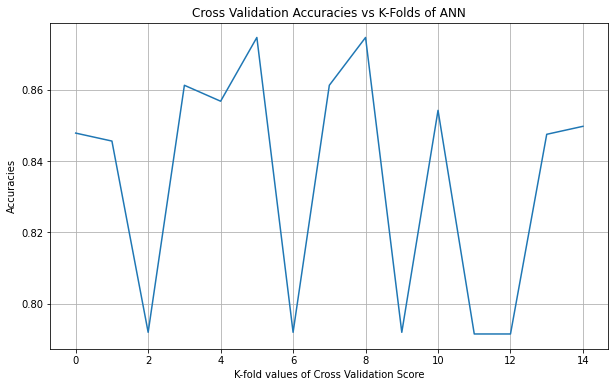

In [ ]:
plt.subplots(figsize = (10,6))
plt.plot(accuracies)
plt.xlabel("K-fold values of Cross Validation Score")
plt.ylabel("Accuracies")
plt.title("Cross Validation Accuracies vs K-Folds of ANN")
plt.grid(axis = "both")

plt.show()

In [ ]:
print("Best accuracy : {} @ k-fold value of {}".format(round(accuracies.max()*100,2),accuracies.argmax()))

Best accuracy : 87.47 @ k-fold value of 5


In [ ]:
#Deep learning with gridsearch cv

In [ ]:
from sklearn.model_selection import GridSearchCV

def create_model1(optimizer="rmsprop", init="glorot_uniform"):
        
    # create model
    model = Sequential()
    
    # adding input layer
    model.add(Dense(units = 12, kernel_initializer = init, activation = "relu", input_dim = 16))
    
    # adding layer
    model.add(Dense(units = 8, kernel_initializer = init, activation = "relu"))
    
    # adding layer
    model.add(Dense(units = 4, kernel_initializer = init, activation = "relu"))
        
    # adding output layer
    model.add(Dense(units = 1, kernel_initializer = init, activation = "sigmoid"))
    
    # compile model
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model  

In [ ]:
# create model
model_new = KerasClassifier(build_fn = create_model1, epochs = 15, batch_size = 32)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'uniform']

param_grid = dict(optimizer = optimizers, init = init)
grid = GridSearchCV(estimator = model_new, param_grid = param_grid)

result = grid.fit(X_train, y_train)

Epoch 1/15
168/168 [==============================] - 1s 2ms/step - loss: 0.5951 - accuracy: 0.6866
Epoch 2/15
168/168 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8251
Epoch 3/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8259
Epoch 4/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8431
Epoch 5/15
168/168 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8343
Epoch 6/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8503
Epoch 7/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8415
Epoch 8/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8448
Epoch 9/15
168/168 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8543
Epoch 10/15
168/168 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8582

In [ ]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853582 using {'init': 'glorot_uniform', 'optimizer': 'adam'}
0.850746 (0.009369) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.853582 (0.007932) with: {'init': 'glorot_uniform', 'optimizer': 'adam'}
0.851642 (0.010006) with: {'init': 'uniform', 'optimizer': 'rmsprop'}
0.850746 (0.004060) with: {'init': 'uniform', 'optimizer': 'adam'}
